In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pathlib
import joblib
import torch

In [3]:
BASE_DIR = pathlib.Path().resolve().parent

DATA_DIR = BASE_DIR / 'data'

EXPORTS_DIR = DATA_DIR / 'exports'
XRAY_LUNG_CLF_DIR = DATA_DIR / 'xray_lung_clf'

TRAIN_DATA_PATH = XRAY_LUNG_CLF_DIR / 'train'
TEST_DATA_PATH = XRAY_LUNG_CLF_DIR / 'test'

TRAIN_ANNOTATIONS_PATH = XRAY_LUNG_CLF_DIR / 'train_annotations.json'
TEST_ANNOTATIONS_PATH = XRAY_LUNG_CLF_DIR / 'test_annotations.json'

EXPORTS_LUNGCLF_DIR = EXPORTS_DIR / 'xray_lung_clf'

EXPORTS_TRAIN_DATA_PATH = EXPORTS_LUNGCLF_DIR / 'train_X.z'
EXPORTS_TEST_DATA_PATH = EXPORTS_LUNGCLF_DIR / 'test_X.z'

EXPORTS_TRAIN_LABELS_PATH = EXPORTS_LUNGCLF_DIR / 'train_Y.z'
EXPORTS_TEST_LABELS_PATH = EXPORTS_LUNGCLF_DIR / 'test_Y.z'

EXPORTS_CLASS_WEIGHTS_PATH = EXPORTS_LUNGCLF_DIR / 'class_weights.z'

EXPORTS_LUNGCLF_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
with open(EXPORTS_TRAIN_DATA_PATH, 'rb') as f:
    X_train = joblib.load(f)

with open(EXPORTS_TEST_DATA_PATH, 'rb') as f:
    X_test = joblib.load(f)

with open(EXPORTS_TRAIN_LABELS_PATH, 'rb') as f:
    Y_train = joblib.load(f)
    
with open(EXPORTS_TEST_LABELS_PATH, 'rb') as f:
    Y_test =joblib.load(f)

(array([ 958.,  203., 1135.,   46.,  222.,  200.,   59.,   31.,   88.,
          83.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

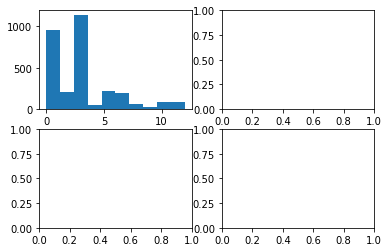

In [5]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(np.argmax(Y_train, axis=1))

In [11]:
Y_train[14,:]

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# 'Sickest' person in training group
idx_max_sick = np.argmax(np.sum(Y_train, axis=1))
Y_train[idx_max_sick, :]

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.], dtype=float32)

# Extract weights for training

In [15]:
X_train.shape

(3025, 1, 256, 256)

For example, if a dataset contains 100 positive and 300 negative examples of a single class, then pos_weight for the class should be equal to $300 / 100 = 3$. The loss would act as if the dataset contains $3 × 100 = 300$ positive examples.



In [13]:
weights = torch.sum(torch.tensor(Y_train)) / torch.sum(torch.tensor(Y_train), axis=0) 
print(weights)

tensor([20.7430, 31.4939, 23.1614,  3.8288, 38.8346,  4.3586, 37.7007, 12.3565,
        16.5016, 44.9130, 16.5016, 12.5364, 33.5390])


In [41]:
with open(EXPORTS_CLASS_WEIGHTS_PATH, 'wb') as f:
    torch.save(weights, f)

In [16]:
with open(EXPORTS_CLASS_WEIGHTS_PATH, 'rb') as f:
    weights = torch.load(f)